In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [2]:
def filename2snr(filename):
    v,mu_a,sig_a,v2,g_shape,g_scale,v3 = filename.replace('.','_').split('_')
    varb = (float(g_shape)*float(g_scale)**2)
    vara = (float(sig_a)**2)
    return varb/(vara)

def make_table(df,method,value):
    return df[df['method']==method].pivot(index='N', columns='snr', values=value)

def make_plot(ax,df_img,label,norm):
    pix = ax.imshow(np.log10(df_img.to_numpy()),aspect='auto',norm=norm)

    ax.set_xticklabels([str(a) for a in range(2,10)])
    ax.set_yticklabels(['',r'$10^2$',r'$10^{2.5}$',r'$10^{3}$',r'$10^{3.5}$',r'$10^{4}$',''])

    
    ax.set_xlabel('SNR')
    ax.set_ylabel('Datapoints')
    ax.set_title(label)
    return pix

In [3]:
df = pd.read_csv('report.csv')
df['snr'] = [filename2snr(fn) for fn in df['filename']]

/tmp/ipykernel_234858/1889297480.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(a) for a in range(2,10)])
/tmp/ipykernel_234858/1889297480.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['',r'$10^2$',r'$10^{2.5}$',r'$10^{3}$',r'$10^{3.5}$',r'$10^{4}$',''])


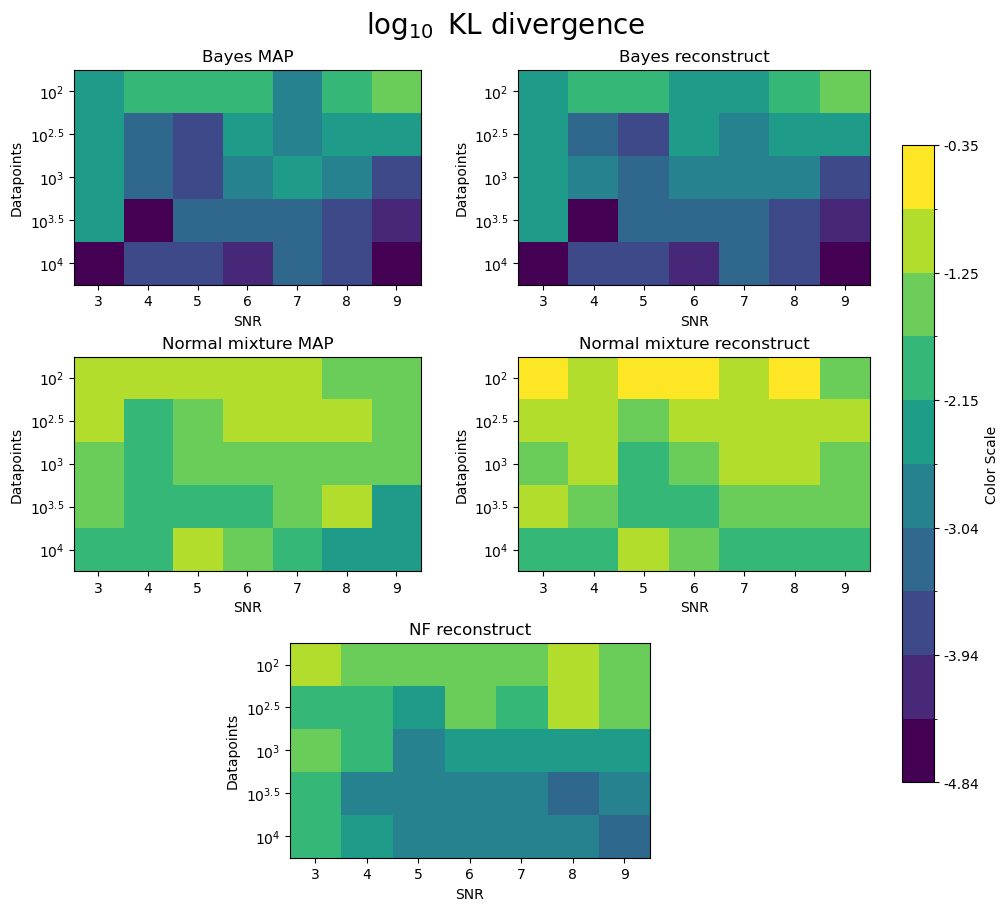

In [4]:
mosaic = [['a','a','b','b'],
          ['c','c','d','d'],
          ['X','e','e','X']]
fig = plt.figure(layout="constrained",figsize=(10,9))
axs = fig.subplot_mosaic(mosaic, empty_sentinel='X')


lvl = np.log10(df[['KL_MAP','KL_reconstruct']].to_numpy())
levels = np.linspace(0, 1, 11)*(lvl.max()-lvl.min()) + lvl.min()
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

df_img=make_table(df,'bayes','KL_MAP')
make_plot(axs['a'],df_img, r'Bayes MAP',norm)
df_img=make_table(df,'bayes','KL_reconstruct')
make_plot(axs['b'],df_img, r'Bayes reconstruct',norm)
df_img=make_table(df,'npbayes','KL_MAP')
make_plot(axs['c'],df_img, r'Normal mixture MAP',norm)
df_img=make_table(df,'npbayes','KL_reconstruct')
make_plot(axs['d'],df_img, r'Normal mixture reconstruct',norm)
df_img=make_table(df,'NF','KL_MAP')
pix = make_plot(axs['e'],df_img, r'NF reconstruct',norm)


# Add a colorbar on the side with explicit ticks and labels
cbar = fig.colorbar(pix, ax=list(axs.values()), orientation='vertical', fraction =.04,pad=0.04)
cbar.set_label('Color Scale')

# Set ticks and labels to match the levels
#cbar.set_ticks(levels)
cbar.set_ticklabels([f'{level:.2f}' for level in levels])

fig.suptitle( r'$\log_{10}$ KL divergence', fontsize=20 )
#plt.tight_layout()
plt.savefig('graphs/fig4.png',dpi=300)

In [5]:
a =''
for S in [3.16, 10, 31.62]:
    a+= 'python PROD_Bayes.py 100 {} ;'.format(S)
    a+= 'python PROD_WMBayes.py 100 {} ;'.format(S)
    a+= 'python PROD_Normflow.py 100 {} ;'.format(S)
    

In [6]:
diralpha = ((.9)**np.arange(20))

In [7]:
diralpha/diralpha.sum()

array([0.11384033, 0.10245629, 0.09221066, 0.0829896 , 0.07469064,
       0.06722157, 0.06049942, 0.05444948, 0.04900453, 0.04410407,
       0.03969367, 0.0357243 , 0.03215187, 0.02893668, 0.02604302,
       0.02343871, 0.02109484, 0.01898536, 0.01708682, 0.01537814])

In [8]:
a,b,c ='','',''
for N in(100,316,1000,3160,10000):
    for sig in ('3.16','10','31.62'):
        a+= 'python PROD_Normflow.py {} {};'.format(N,sig)
        b+= 'python PROD_Bayes.py {} {};'.format(N,sig)
        c+= 'python PROD_NPBayes.py {} {};'.format(N,sig)
print(b+c+a)

python PROD_Bayes.py 100 3.16;python PROD_Bayes.py 100 10;python PROD_Bayes.py 100 31.62;python PROD_Bayes.py 316 3.16;python PROD_Bayes.py 316 10;python PROD_Bayes.py 316 31.62;python PROD_Bayes.py 1000 3.16;python PROD_Bayes.py 1000 10;python PROD_Bayes.py 1000 31.62;python PROD_Bayes.py 3160 3.16;python PROD_Bayes.py 3160 10;python PROD_Bayes.py 3160 31.62;python PROD_Bayes.py 10000 3.16;python PROD_Bayes.py 10000 10;python PROD_Bayes.py 10000 31.62;python PROD_NPBayes.py 100 3.16;python PROD_NPBayes.py 100 10;python PROD_NPBayes.py 100 31.62;python PROD_NPBayes.py 316 3.16;python PROD_NPBayes.py 316 10;python PROD_NPBayes.py 316 31.62;python PROD_NPBayes.py 1000 3.16;python PROD_NPBayes.py 1000 10;python PROD_NPBayes.py 1000 31.62;python PROD_NPBayes.py 3160 3.16;python PROD_NPBayes.py 3160 10;python PROD_NPBayes.py 3160 31.62;python PROD_NPBayes.py 10000 3.16;python PROD_NPBayes.py 10000 10;python PROD_NPBayes.py 10000 31.62;python PROD_Normflow.py 100 3.16;python PROD_Normflow.py